# argo_seasonality

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [2]:
import filt_funcs as ff
import EKE_funcs as ef

In [14]:
so_ds=xr.open_dataset("202206_lon:(25,45)_lat:(-60,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
so_param = [25,45,-60,-50]

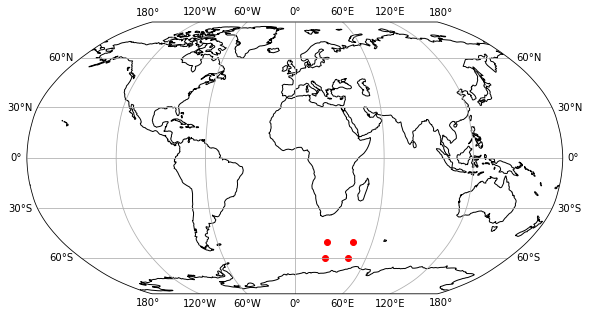

In [18]:
plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.plot(so_param[0],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[0],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[2],transform=ccrs.PlateCarree(),marker='o',color='r')
plt.plot(so_param[1],so_param[3],transform=ccrs.PlateCarree(),marker='o',color='r')

Text(0.5, 1.0, '# floats per 3-month group')

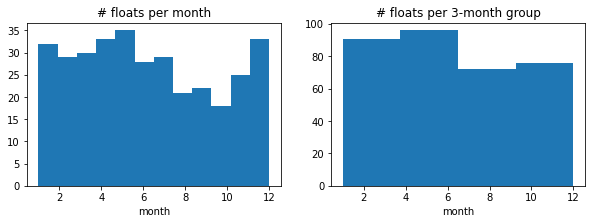

In [71]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
so.TIME.dt.month.plot.hist(bins=12)
plt.title('# floats per month')

plt.subplot(1,2,2)
so.TIME.dt.month.plot.hist(bins=4)
plt.title('# floats per 3-month group')

Want:

- Group 1: months 1,2,3 (Jan,Feb,Mar)
- Group 2: months 4,5,6 (Apr,May,Jun)
- Group 3: months 7,8,9 (Jul,Aug,Sep)
- Group 4: months 10,11,12 (Oct,Nov,Dec)

In [33]:
so1 = so.where(so.TIME.dt.month>0).where(so.TIME.dt.month<4)
so2 = so.where(so.TIME.dt.month>3).where(so.TIME.dt.month<7)
so3 = so.where(so.TIME.dt.month>6).where(so.TIME.dt.month<10)
so4 = so.where(so.TIME.dt.month>9).where(so.TIME.dt.month<13)

In [34]:
so1_TEMP_EKE = ef.get_EKE(so1,100)
so2_TEMP_EKE = ef.get_EKE(so2,100)
so3_TEMP_EKE = ef.get_EKE(so3,100)
so4_TEMP_EKE = ef.get_EKE(so4,100)

In [50]:
so1_PSAL_EKE = ef.get_EKE(so1,100,variable='PSAL')
so2_PSAL_EKE = ef.get_EKE(so2,100,variable='PSAL')
so3_PSAL_EKE = ef.get_EKE(so3,100,variable='PSAL')
so4_PSAL_EKE = ef.get_EKE(so4,100,variable='PSAL')

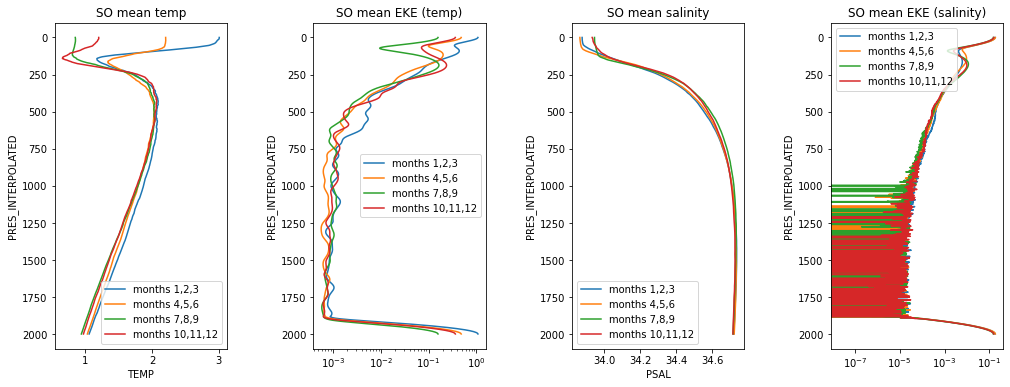

In [70]:
plt.figure(figsize=(17,6))

plt.subplot(1,4,1)
so1.TEMP.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 1,2,3')
so2.TEMP.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 4,5,6')
so3.TEMP.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 7,8,9')
so4.TEMP.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 10,11,12')
plt.gca().invert_yaxis()
plt.legend()
plt.title('SO mean temp')

plt.subplot(1,4,2)
so1_TEMP_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 1,2,3')
so2_TEMP_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 4,5,6')
so3_TEMP_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 7,8,9')
so4_TEMP_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 10,11,12')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.legend()
plt.title('SO mean EKE (temp)')

plt.subplot(1,4,3)
so1.PSAL.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 1,2,3')
so2.PSAL.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 4,5,6')
so3.PSAL.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 7,8,9')
so4.PSAL.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 10,11,12')
plt.gca().invert_yaxis()
plt.legend()
plt.title('SO mean salinity')

plt.subplot(1,4,4)
so1_PSAL_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 1,2,3')
so2_PSAL_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 4,5,6')
so3_PSAL_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 7,8,9')
so4_PSAL_EKE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='months 10,11,12')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.legend()
plt.title('SO mean EKE (salinity)')

plt.subplots_adjust(wspace=0.5)